Chris Washington, played by Daniel Kaluuya, from Get Out.   Universal Pictures

_Get Out_ has been one of the most talked about films in 2017 and as of April 2017 [was the highest grossing debut film based on an original screenplay in history](http://www.thefader.com/2017/04/04/get-out-original-screenplay-record). I wanted to find out how _Get Out_ ranked amongst other 2017 American films and to find out which film has earned the most revenue in 2017.

[The Movie DB](https://www.themoviedb.org/) has a free API to programmatically access information about movies.

In order to get started with TMDB:
  1. [Create a free account](https://www.themoviedb.org/account/signup)
  2. Check your e-mail to verify your account.
  3. Visit the [API Settings page](https://www.themoviedb.org/settings/api) in your Account Settings and request an api key 
  4. You should now have an API key and be ready to go!
  

In [510]:
import config
import requests
import locale
locale.setlocale( locale.LC_ALL, '' )
# import numpy as np
import pandas
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [511]:
api_key = config.tmdb_api_key

# What are the highest earning American films of 2017?

In [512]:
responsed = requests.get('https://api.themoviedb.org/3/discover/movie?api_key=' +  api_key +'&certification_country=US&certification=R&sort_by=revenue.desc&with_cast=3896')

In [473]:
revenue_list = responsed.json()

In [474]:
response = requests.get('https://api.themoviedb.org/3/discover/movie?api_key=' +  api_key + '&primary_release_year=2017&sort_by=revenue.desc')

In [475]:
highest_revenue = response.json()

In [ ]:
# uncomment the next line to get a peek at the highest_revenue json structure
# highest_revenue

In [476]:
highest_revenue_films = highest_revenue['results']

In [478]:

columns = ['film', 'revenue']

df = pandas.DataFrame(columns=columns)

In [509]:
for film in highest_revenue_films:
    # print(film['title'])
    film_revenue = requests.get('https://api.themoviedb.org/3/movie/'+ str(film['id']) +'?api_key='+ api_key+'&language=en-US')
    film_revenue = film_revenue.json()
    #print(locale.currency(film_revenue['revenue'], grouping=True ))
    df.loc[len(df)]=[film['title'],film_revenue['revenue']]
    


In [480]:
df.head()

,film,revenue
0,Beauty and the Beast,1221782049
1,The Fate of the Furious,1212583865
2,Guardians of the Galaxy Vol. 2,744784722
3,Logan,608578340
4,Kong: Skull Island,565151307


In [481]:
matplotlib.style.use('ggplot')

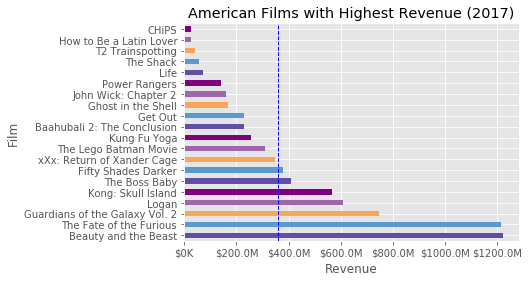

In [502]:
fig, ax = plt.subplots()
df.plot(kind="barh", y='revenue', color = ['#624ea7', '#599ad3', '#f9a65a', '#9e66ab', 'purple'], x=df['film'], ax=ax)
formatter = FuncFormatter(currency)
ax.xaxis.set_major_formatter(formatter)
ax.legend().set_visible(False)

avg = df['revenue'].mean()

# Add a line for the average
ax.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=1)

ax.set(title='American Films with Highest Revenue (2017)', xlabel='Revenue', ylabel='Film')

# What are the highest earning American films of all time?

In [484]:
response = requests.get('https://api.themoviedb.org/3/discover/movie?api_key=' +  api_key + '&sort_by=revenue.desc')
highest_revenue_ever = response.json()

In [494]:
highest_revenue_films_ever = highest_revenue_ever['results']

In [495]:
columns = ['film', 'revenue', 'budget']

highest_revenue_ever_df = pandas.DataFrame(columns=columns)

In [515]:
for film in highest_revenue_films_ever:
    # print(film['title'])
   
    film_revenue = requests.get('https://api.themoviedb.org/3/movie/'+ str(film['id']) +'?api_key='+ api_key+'&language=en-US')
    film_revenue = film_revenue.json()

    # print(locale.currency(film_revenue['revenue'], grouping=True ))
    
    # Lord of the Rings duplicate w/ bad data was being returned  https://www.themoviedb.org/movie/454499-the-lord-of-the-rings
    # It's budget was $281 which is way too low for a top-earning film. Therefore in order to be added to dataframe the film 
    # budget must be greater than $281.
    
    if film_revenue['budget'] > 281:
        # print(film_revenue['budget'])
        highest_revenue_ever_df.loc[len(highest_revenue_ever_df)]=[film['title'],film_revenue['revenue'], (film_revenue['budget'] * -1)]

In [516]:
highest_revenue_ever_df.head()

,film,revenue,budget
0,Avatar,2781505847,-237000000
1,Star Wars: The Force Awakens,2068223624,-245000000
2,Titanic,1845034188,-200000000
3,The Avengers,1519557910,-220000000
4,Jurassic World,1513528810,-150000000


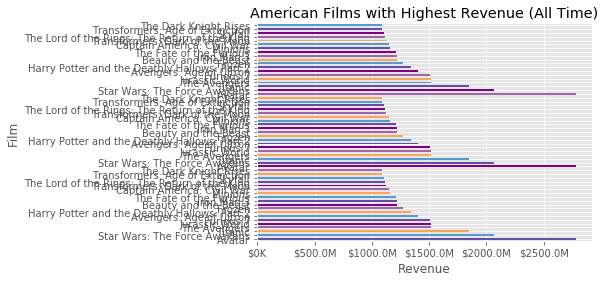

In [517]:
fig, ax = plt.subplots()
highest_revenue_ever_df.plot(kind="barh", y='revenue', color = ['#624ea7', '#599ad3', '#f9a65a', '#9e66ab', 'purple'], x=highest_revenue_ever_df['film'], ax=ax)
formatter = FuncFormatter(currency)
ax.xaxis.set_major_formatter(formatter)
ax.legend().set_visible(False)

# avg = df['revenue'].mean()

# Add a line for the average
# ax.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=1)

ax.set(title='American Films with Highest Revenue (All Time)', xlabel='Revenue', ylabel='Film')

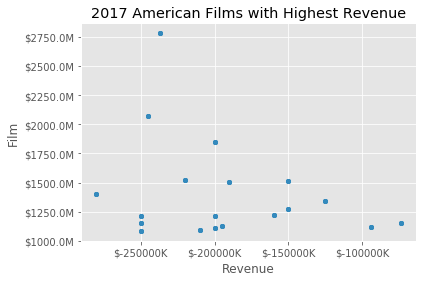

In [519]:
fig, ax = plt.subplots()
highest_revenue_ever_df.plot(kind='scatter', y='revenue', x='budget', ax=ax)
formatter = FuncFormatter(currency)
ax.xaxis.set_major_formatter(formatter)
ax.yaxis.set_major_formatter(formatter)


x = highest_revenue_ever_df['budget']
y = highest_revenue_ever_df['revenue']

ax.set(title='2017 American Films with Highest Revenue', xlabel='Revenue', ylabel='Film')

